In [1]:
# パーセプトロンAPI
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.(トレーニングデータのトレーニング回数)
    random_state : int
      Random number generator seed for random weight
      initialization.（重みを初期化するための乱数シード）

    Attributes（属性）
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        # 正規分布の従う乱数
        # numpy.random.normal(平均, 標準偏差, 出力する件数) 
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):   # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y):  # 各サンプルで重みを更新
                update = self.eta * (target - self.predict(xi))  # 式2.1.5
                self.w_[1:] += update * xi
                # 重みw0の更新
                self.w_[0] += update
                # 更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            # 反復回数毎の誤差を格納
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        # 内積
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
# irisデータ取得
import pandas as pd

# df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
df = pd.read_csv("C://Users/zack7/Desktop/work/03.ML/Python_machine_learning/iris.data", header = None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


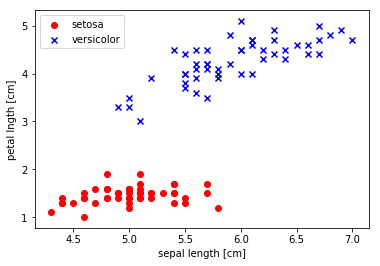

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 1-100行目の目的変数(4列目)の抽出
y = df.iloc[0:100, 4].values
#y
# Iris-sectosa = -1, Iris-versicolor = 1 に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1, 3列を抽出
X = df.iloc[0:100, [0, 2]].values
#X
# 品種setosaのplot（赤）、versicolorのplot（青）
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label='versicolor')
# グラフ設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal lngth [cm]')
plt.legend(loc = 'upper left')
plt.show()

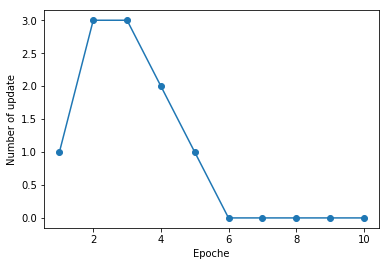

In [16]:
# irisデータでパーセプトロンのトレーニング
# オブジェクト作成
ppn = Perceptron(eta = 0.1, n_iter = 10)
# モデルへの適合
ppn.fit(X,y)

# エポックと誤分類誤差の関係をplot
# エポック数：「一つの訓練データを何回繰り返して学習させるか」の数
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epoche')
plt.ylabel('Number of update')
plt.show()


In [25]:
# 決定境界の可視化関数
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # マーカー、カラーマップ
    markers = ('s', 'x', 'o', '^', 'v')
    colors  = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap    = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のplot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    # 各特長量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のplot
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをplot
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolors='black')

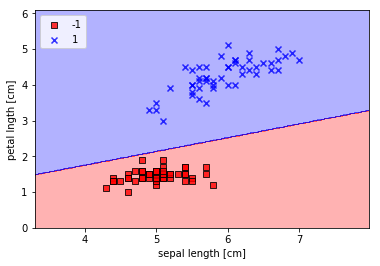

In [27]:
# 決定境界のplot
plot_decision_regions(X, y,classifier=ppn)
# グラフ設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal lngth [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [28]:
# ADALINE（2.5）
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.
      (重みを初期化するための乱数シード)
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
      （各エポックでの誤差平方和のコスト関数）
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            # 誤差の計算 y(i)-phi(z(i))
            errors = (y - output)
            # wの更新
            # 式2.5.5 p.36
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算 式2.5.1
            cost = (errors**2).sum() / 2.0
            # コストの格納
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


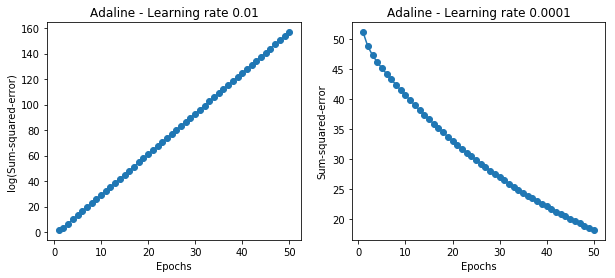

In [30]:
# 学習率ηの収束確認
# 描画領域の1行2列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# η=0.01でのADALINE
ada1 = AdalineGD(n_iter=50, eta=0.01).fit(X, y)
# エポック数とコストの関係をplot
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# η=0.0001でのADALINE
ada2 = AdalineGD(n_iter=50, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')


plt.show()

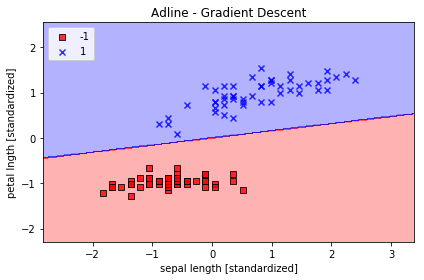

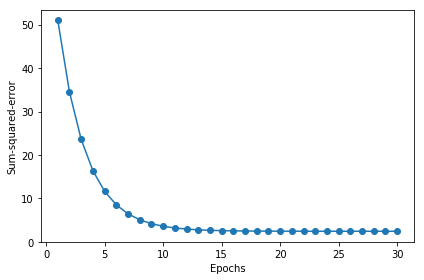

In [34]:
# 標準化 2.5.2
# データコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# 標準化後に再トレーニング
ada = AdalineGD(n_iter=30, eta=0.01).fit(X_std, y)

plot_decision_regions(X_std, y, classifier = ada)

plt.title('Adline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal lngth [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

# 標準化することでη=0.01の学習率でも収束する。
# しかし標準化したとしても誤差平方和は０にならない。

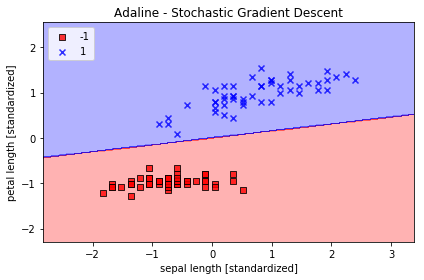

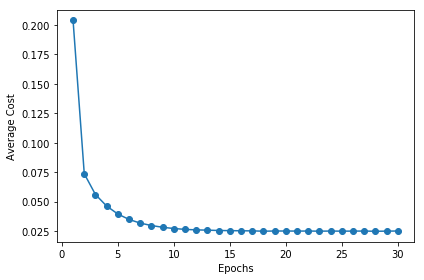

In [35]:
# 2.6 確率的勾配降下法

from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
      True：循環を回避するためにエポック毎にトレーニングデータをシャッフル
    random_state : int
      Random number generator seed for random weight initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all training samples in each epoch.
        
    """
    def __init__(self, eta=0.01, n_iter=20, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        # 重みの初期化フラグ
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        # 重みベクトル
        self._initialize_weights(X.shape[1])
        # コスト格納用のリスト
        self.cost_ = []
        for i in range(self.n_iter):
            # 指定されたトレーニングデータのシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        # 目的変数yの要素数が2以上の場合、
        # 各サンプルの特長量xiと目的関数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 目的変数yの要素数が1の場合、
        # サンプル全体の特長量Xと目的関数yで重みを更新
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)




ada = AdalineSGD(n_iter=30, eta=0.01, random_state=1).fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()



#ada.partial_fit(X_std[0, :], y[0])
